In [2]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

In [3]:
nnfs.init()

In [4]:
X, y = spiral_data(900, 3)

In [22]:
class ActivationReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        return self.output
class DenseLayer:
    def __init__(self, n_feature, n_neurons):
        self.weights = 0.1 * np.random.randn(n_feature, n_neurons)
        self.biases = np.ones((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        return self.output


class ActivationSoftmax:
    def forward(self, inputs):
        clipped = np.clip(inputs, 1e-7, 1-1e-7)
        exps = np.exp(clipped)
        normalized = np.sum(exps, axis=1, keepdims=True)

        self.output = exps / normalized
        return self.output
    

class Loss:
    def calc(self, Y_true, Y_pred):
        losses = self.forward(Y_true, Y_pred)
        loss = np.mean(losses)

        return loss
    
class CategoricalEntropyLoss(Loss):
    def forward(self, Y_true, Y_pred):
        n_samples = len(Y_pred)
        Y_pred_clipped = np.clip(Y_pred, 1e-7, 1-1e-7)

        confs = Y_pred_clipped[range(n_samples), Y_true]

        neg_log_likelihood = -np.log(confs)

        return neg_log_likelihood


In [69]:
layer1 = DenseLayer(2, 32)
activation1 = ActivationReLU()

layer2 = DenseLayer(32, 32)
activation2 = ActivationReLU()

layer3 = DenseLayer(32, 3)
activation3 = ActivationSoftmax()

loss = CategoricalEntropyLoss()

layer1.forward(X)
activation1.forward(layer1.output)

layer2.forward(activation1.output)
activation2.forward(layer2.output)

layer3.forward(activation2.output)
probs = activation3.forward(layer3.output)

loss.calc(y, activation3.output)

# print(activation1.output)
# print(activation2.output)



1.1109491629386867

In [70]:
preds = []
for prob in probs:
    preds.append(np.argmax(prob))

preds

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


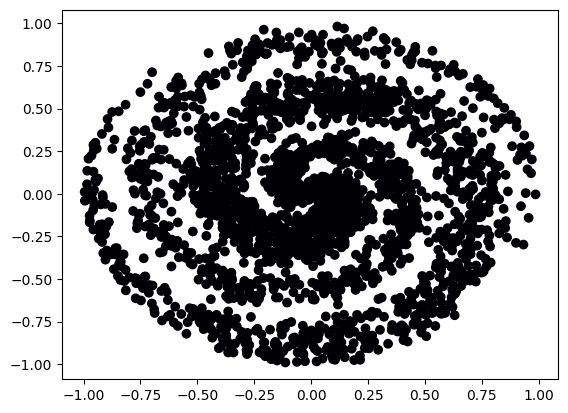

In [71]:
plt.scatter(X[:,0], X[:, 1], c=preds, cmap="magma")
